In [1]:
'''
    WARNING CONTROL to display or ignore all warnings
'''
import warnings; warnings.simplefilter('default')     #switch betweeb 'default' and 'ignore'

''' Set debug flag to view extended error messages; else set it to False to turn off debugging mode '''
debug = True

## Load and View Schema

In [17]:
import pandas as pd

_grp_book_df = pd.read_csv("../sample_data/enrich_date.csv")
_grp_book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        25 non-null     object 
 1   Nights      25 non-null     int64  
 2   Rooms       25 non-null     int64  
 3   AgentCost   25 non-null     float64
 4   RoomNights  25 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


## Enrich the dataset

### Declare DataEnricment class

In [13]:
import sys
sys.path.insert(1, '../wrangler')
import enrich as en

if debug:
    import importlib
    en = importlib.reload(en)

data_name = "travel_bookings"
cls_enrich = en.DataEnrichment(name=data_name)
print(dir(cls_enrich))
print(cls_enrich._aug_dict)

Initialing DataEnrichment class for  travel_bookings
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_aug_dict', '_cols_to_augment_dict', '_date_col_name', '_kwargs', 'get_DD', 'get_DOW', 'get_MM', 'get_MMM', 'get_MMM_DD', 'get_YYYY', 'get_dt_augmentations', 'get_enriched_data', 'name', 'set_imputation', 'set_multi_currency']
{'DateTime': ['ALL', 'DOW', 'YYYY', 'YY', 'MMM', 'MM', 'MMM-DD']}


### Augment with Date columns
For the ease of sorting and displaying the date value by month & day

In [14]:
import pandas as pd

col_to_augment_dict = {"DateTime" :   # type of datetime columns to augment the dataframe
                       ["YYYY",       # 4 digit year (int)
                        "DD",         # day as 1 digit and 2 digit if abbreviation = true
                        "MM",         # month as 1 digit and 2 digit if abbreviation = true
                        "MMM",        # month as name or 3 letters if abbreviation = True
                        "DOW",        # day-of-week name or 3 letter if abbreviation = True
                        "MMM-DD",     # three letter two digit month and two digit day (e.g. [09]Sep-10)
                       ]
                      }
_kwargs = {"dt_col_name" : "Date",    # identifies the datetime column in the dataframe
           "pad_lead_zeros" : True,   # truncates the string to give 3 character names for year, month, dow
           "abbreviate" : True,
           "sorted_by" : ["YYYY","MM","DD"]
          }
_enriched_df = cls_enrich.get_enriched_data(_grp_book_df,
                                            col_augment_dict = col_to_augment_dict,
                                            **_kwargs
                                   )
_aug_cols = col_to_augment_dict["DateTime"]
_grp_book_df[_aug_cols] = _enriched_df[_aug_cols]

''' sort by date '''
_grp_book_df = _grp_book_df.sort_values(by=["YYYY","MM","DD"],kind='quicksort')
print(_grp_book_df.head())
print("\nEnrichment Complete!")

[Error]Class <DataEnrichment> Function <get_enriched_data> 0     2021-02-07
1     2021-08-15
2     2022-04-07
3     2021-08-31
4     2022-12-27
5     2022-01-26
6     2022-09-07
7     2022-08-20
8     2021-05-02
9     2023-02-21
10    2022-06-30
11    2021-08-29
12    2021-11-25
13    2022-02-16
14    2022-04-13
15    2023-11-06
16    2021-01-21
17    2022-01-04
18    2021-11-29
19    2021-07-01
20    2022-02-02
21    2021-06-15
22    2021-04-24
23    2022-05-15
24    2023-02-22
Name: Date, dtype: object column is an invalid datetime
Traceback (most recent call last):
  File "/home/gnewy/workspace/rezgate/notebooks/../wrangler/enrich.py", line 108, in get_enriched_data
    raise ValueError("{} column is an invalid datetime".format(df[self._date_col_name]))
ValueError: 0     2021-02-07
1     2021-08-15
2     2022-04-07
3     2021-08-31
4     2022-12-27
5     2022-01-26
6     2022-09-07
7     2022-08-20
8     2021-05-02
9     2023-02-21
10    2022-06-30
11    2021-08-29
12    2021-11-25


KeyError: "None of [Index(['YYYY', 'DD', 'MM', 'MMM', 'DOW', 'MMM-DD'], dtype='object')] are in the [columns]"

# Plot time series by year

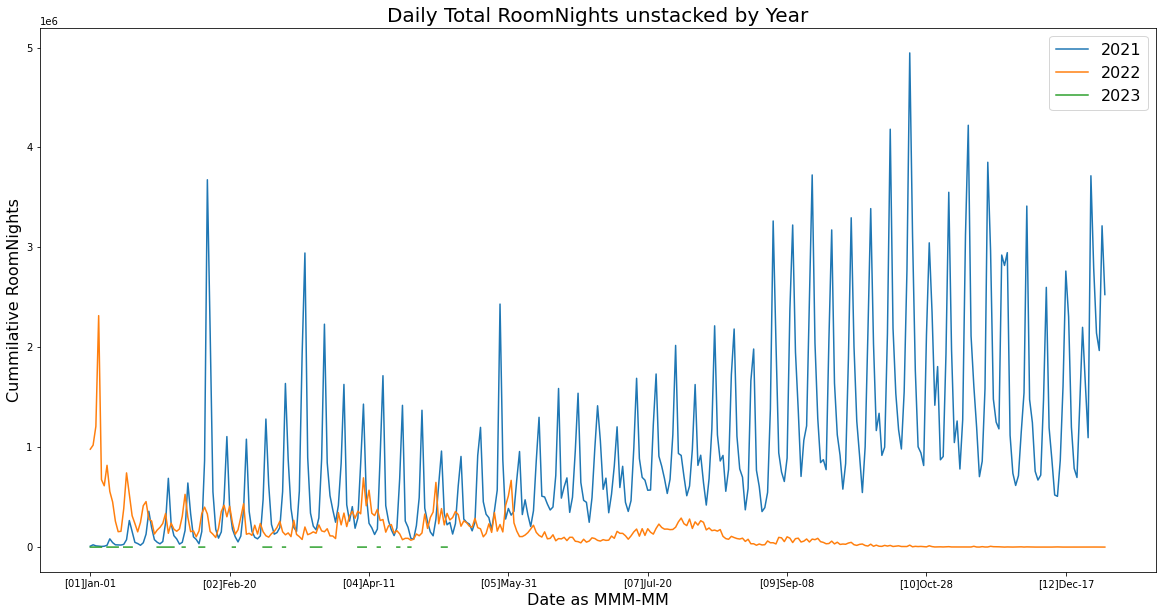

In [17]:
''' Plot the individual year time series'''

''' change y_var to view the desired time series '''
y_var = "RoomNights"   # set the dependent variable (e.g. RoomNights, AgentCost)

unstacked = _grp_book_df.set_index(['YYYY','MMM-DD'])[y_var].unstack(-2)
ax = unstacked.plot(figsize=(20, 10),
                    fontsize=10)
ax.set_title("Daily Total "+y_var+" unstacked by Year", fontsize=20)
ax.set_xlabel("Date as MMM-MM",fontsize=16)
ax.set_ylabel("Cummilative "+y_var, fontsize=16)
ax.legend(fontsize=16)